# Data Science Project - EdTech Lead Conversion Analysis

### Supervised Learning: Classification and Hypothesis Testing

### By Jess.T


### Context

The EdTech industry has experienced significant growth in recent years, driven by various factors such as the ease of information sharing, personalized learning experiences, and transparent assessments. As a result, online education has become increasingly preferred over traditional methods. The sector has witnessed even greater growth due to the COVID-19 pandemic, as more people turned to online learning platforms while staying at home. This surge in demand has led to the emergence of numerous new companies in the industry.According to a forecast, the online education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. 

In order to tap into this expanding market and reach a wider audience, digital marketing resources have become readily available and user-friendly for EdTech companies. These resources enable companies to engage with potential customers, referred to as leads, through various channels. Leads can be generated when customers interact with marketing content on social media platforms or other online channels, browse through the company's website or app, or connect via email for more information. EdTech companies can capitalize on the growing demand for online education and establish themselves as key players in the industry by effectively engaging with leads and successfully converting them into paid customers. 

### Objective

The objective of this data science project for ExtraaLearn, an early-stage startup offering upskilling programs, is to utilize classification algorithms to analyze leads data and identify those with a higher likelihood of converting to paid customers. By building and evaluating machine learning models, the project aims to uncover the key factors that drive lead conversion and create a profile of leads with a greater chance of converting. The insights gained from this analysis will assist in business development and the formulation of effective strategies for resource allocation. 

By focusing on leads with a higher probability of conversion, ExtraaLearn can optimize its efforts and investments, leading to improved conversion rates and overall business success. The project's outcomes will provide a data-driven approach to lead conversion, contributing to the company's growth and advancement in the competitive EdTech industry.

* Analyze and build ML models with classification algorithms
* Help identify which leads are more likely to convert to paid customers
* Find the factors driving the lead conversion process
* Create a profile of the leads who are likely to convert
* Be useful for business development and advancement of business strategies


### Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

**Data Dictionary**

* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### Libraries Used

**Numpy:**

Numpy is used for handling Numbers, Numerical analysis. It is the fundamental package for array computing with Python.

**Pandas:**

Pandas are used to process the data. Pandas contain data structures and data manipulation tools designed for data cleaning and analysis.

**Matplotlib:**

Matplotlib is a visualization library & has been taken from the software Matlab. We are only considering one part of this library to show plotting, hence used .pyplot which means python plot.

**Seaborn:**

Seaborn is another visualization library. When it comes to the visualization of statistical models like heat maps, Seaborn is among the reliable sources. This Python library is derived from matplotlib and closely integrated with Pandas data structures

**Sklearn:**

Sklearn, or scikit-learn, is a popular machine learning library that provides various tools and algorithms for tasks such as regression, classification, clustering, and model evaluation. In the script, it is used for logistic regression, decision tree model and random forest model. 

**Statsmodels:**

Statsmodels is a library that provides classes and functions for statistical modeling and analysis. In the project, it is used to check the model performance of classification models.



## Importing Necessary Libraries and Data

In [2]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [3]:
learn = pd.read_csv("ExtraaLearn.csv") # read the dataset

In [4]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Data Overview

### View the first and last 5 rows of the dataset

In [5]:
data.head() # view the first 5 rows of the dataset

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [6]:
data.tail() # view the last 5 rows of the dataset

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [7]:
data.shape # get the shape of data

(4612, 15)

#### Observations

There are a total of **4612 rows** and **15 columns**.

### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations

- **No missing value on the total of 15 columns.** All rows of them are 4612 with non-null. 
- There are **3 different data types** - int64 (represents numerical variables), float64 (represents decimal numerical variables) and object (represents categorical variables).
- There are **5 numerical columns** - age, website_visits, time_spent_on_website, page_views_per_visit, status. 
- The rest of the columns are categorical. 

In [9]:
data.duplicated() # check duplicate entries in the data

0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

#### Observations

- No duplication between all the data points. 

In [10]:
data.nunique() # Check the number of unique values in each column

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
data.describe() # print the statistical summary of the data

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


#### Observations

- The mean of the age is 46.2, and the median of age is 51, it shows the age of customer is relatively older. 
- **website_visits**, **time_spent_on_website**, and **page_views_per_visit** have some outliers at the right end as the 75th percentile value of them are far away from their max value. We need to explore this further.

In [12]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

In [13]:
data["ID"].nunique() # check the number of unique values

4612

In [14]:
data.drop(["ID"], axis = 1, inplace = True) # drop "ID" column from data

### Univariate Analysis

### Observations on continuous variables

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

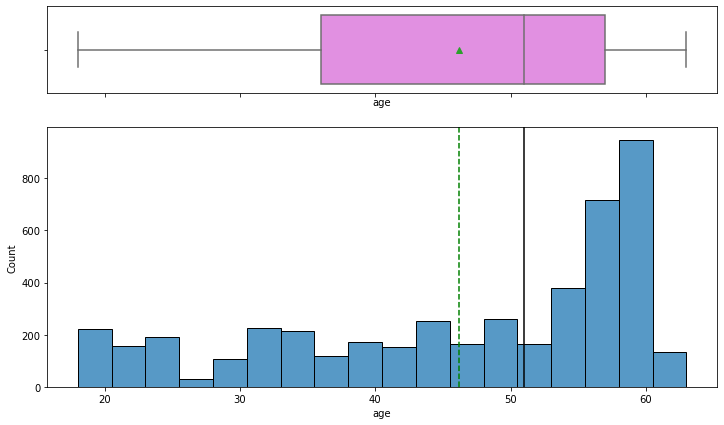

In [16]:
histogram_boxplot(data, "age") 

#### Observations:

- The distribution of age is **left skew**. 
- The youngest leads (minimum) is below 18, while the **mean is around 46, and the median is just over 50.**
- The **largest group of leads (mode) is between 50 and 60**, and some older age leads (maximum) at over 60. 

### Website_visits

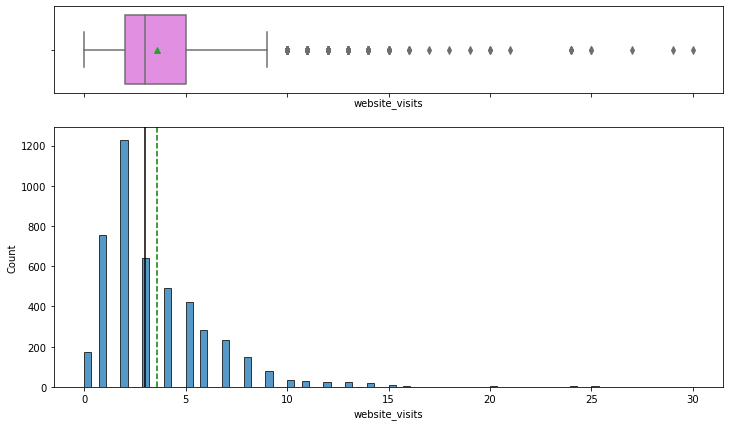

In [17]:
histogram_boxplot(data, "website_visits") 

#### Observations:

- The distribution of website_visits is **right skew.** 
- The mean and median are between 3 and 4. **Most of the leads visit website 2 times.**
- There are many outliners between 10 and 30. 

### Time_spent_on_website

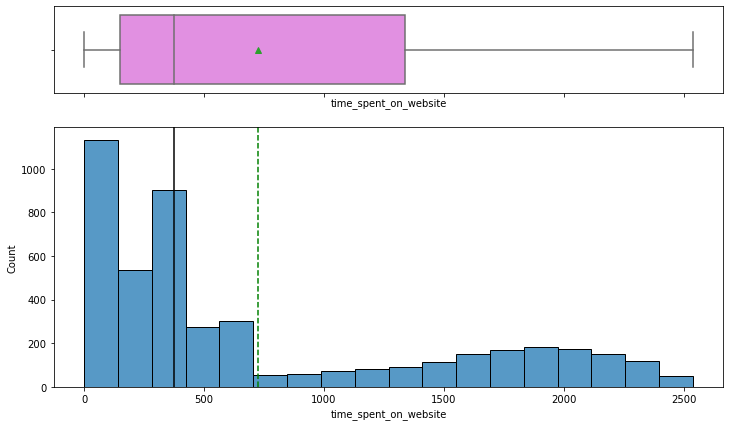

In [18]:
histogram_boxplot(data, "time_spent_on_website") 

#### Observations:

- The distribution of time_spent_on_website is **right skew**.
- **Most of the leads spent time on the website less than 100 minutes (around 1 hour).** 
- Generally, the leads who browse the website **do not exceed 800 minutes (around 13 hours).**
- There are still some leads that spent time between 1000 and 2500 (around 15-40 hours). 

### Page_views_per_visit

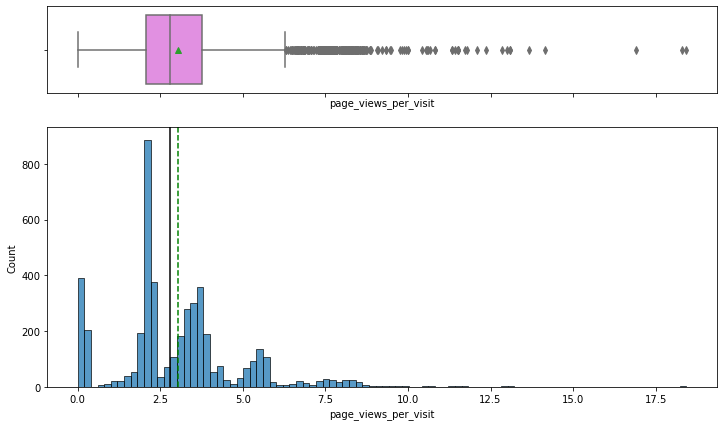

In [19]:
histogram_boxplot(data, "page_views_per_visit") 

#### Observations:

- The distribution of page views per visit is **right skew.**
- **Most of the leads view the page per visit are 2 pages.**
- Generally, the viewed pages **are not more than 6 pages.**

### Observations on categorical variables

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 5, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Current_occupation

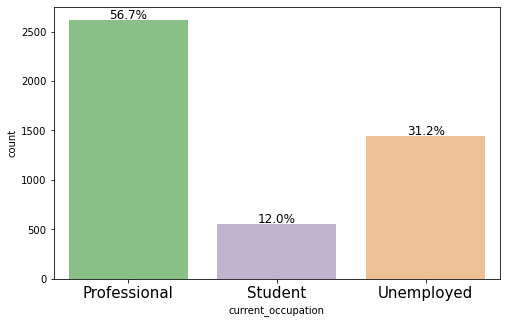

In [21]:
labeled_barplot(data, "current_occupation", perc=True)

#### Observations:

- Most of the lead is **working professional.** Second lead group is unemployed. 

### First_interaction

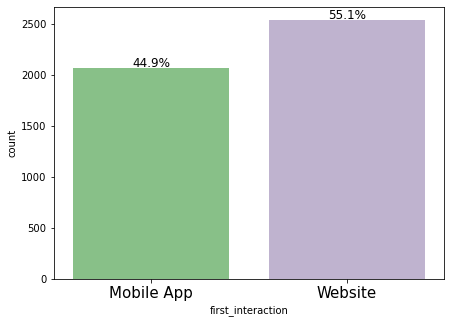

In [22]:
labeled_barplot(data, "first_interaction", perc=True)

#### Observations:

- The leads tend to interract with ExtraaLearn **by website.** 

### Profile_completed

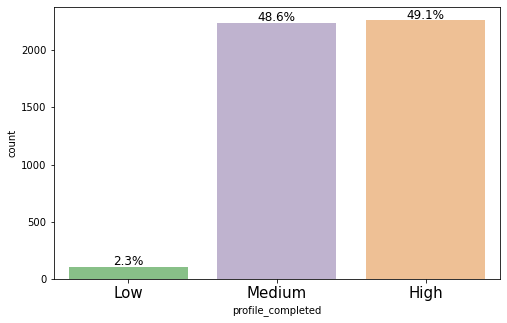

In [23]:
completed_order = ["Low", "Medium", "High"]
data_ordered = data.copy()  # Create a copy of the data DataFrame
data_ordered["profile_completed"] = pd.Categorical(data_ordered["profile_completed"], categories=completed_order, ordered=True)
labeled_barplot(data_ordered, "profile_completed", perc=True)

#### Observations:

- Most of the leads who interracted with ExtraaLearn **are willing to complete the profile.**

### Last_activity

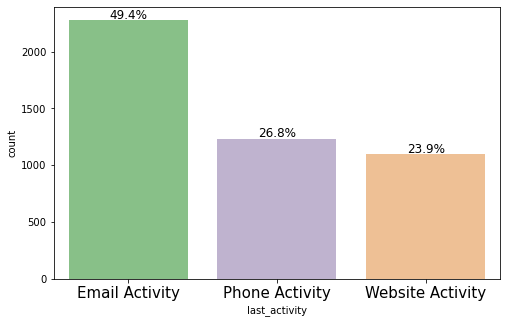

In [24]:
labeled_barplot(data, "last_activity", perc=True)

#### Observations:

- Based on the last activity, **Email is the favorite channel** for interactive action between the leads and ExtraaLearn.

### Print_media_type1

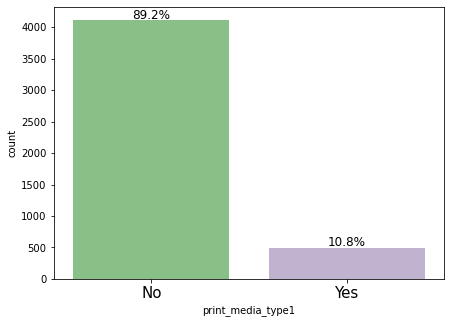

In [25]:
labeled_barplot(data, "print_media_type1", perc=True)

#### Observations:

- **Almost 90% of leads have not seen an advertisement for ExtraaLearn in the Newspaper** (print media_type 1).

### Print_media_type2

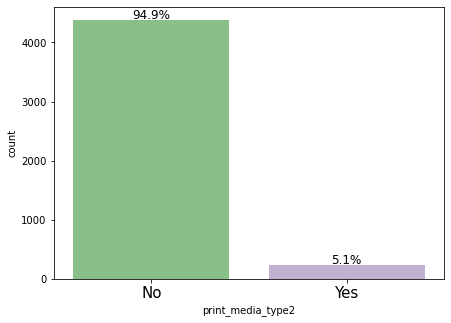

In [26]:
labeled_barplot(data, "print_media_type2", perc=True)

#### Observations:

- **Almost 95% of leads have not seen an advertisement for ExtraaLearn in the Magazine** (print media_type 2).

### Digital_media

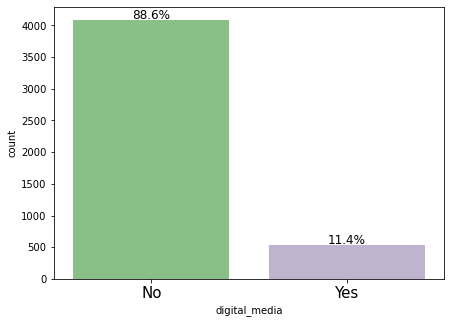

In [27]:
labeled_barplot(data, "digital_media", perc=True)

#### Observations:

- **Almost 90% of leads have not seen an advertisement for ExtraaLearn on the digital platforms.**

### Educational_channels

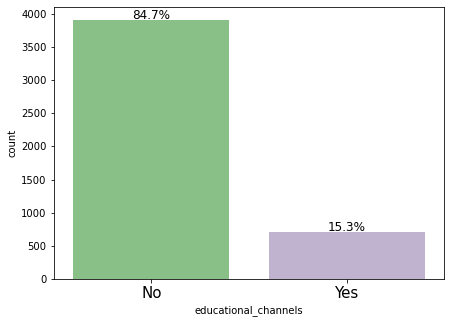

In [28]:
labeled_barplot(data, "educational_channels", perc=True)

#### Observations:

- **Only 15.3% of leads had heard about ExtraaLearn in the education channels** like online forums, discussion threads, educational websites, etc.

### Referral

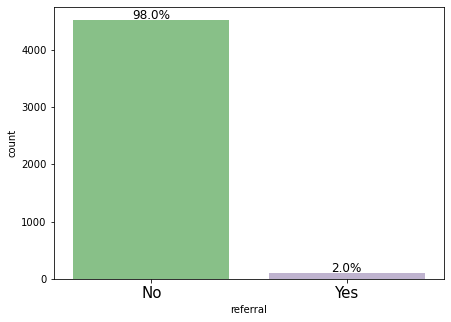

In [29]:
labeled_barplot(data, "referral", perc=True)

#### Observations:

- **Almost all the lead had not heard about ExtraaLearn through reference.** Only 2% of them had heard by referral. 

### Status

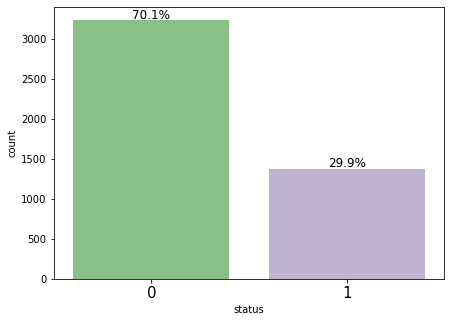

In [30]:
labeled_barplot(data, "status", perc=True)

#### Observations:

- **30% of leads have paid for learning at ExtraaLearn, while 70% of the leads are still not converted to paid customers.**

### Bivariate Analysis

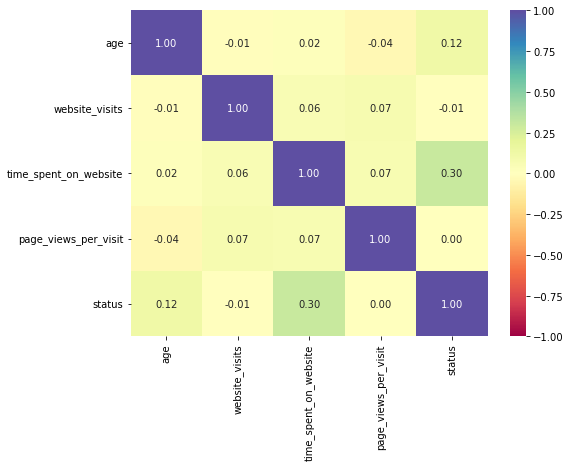

In [31]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:

- There is no significant relationship between the independent variable and the target variable 'status', while **the time spent on the website has relative affection to the payment status.**

### Creating functions for further bivariate analysis

In [32]:
### Creating functions to plot distributions wrt target for further analysis. 

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

### 1. Leads will have different expectations from the outcome of the course, and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


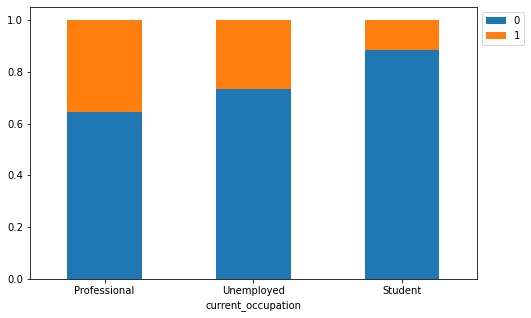

In [34]:
stacked_barplot(data, "current_occupation", "status")

#### Observations:

- **Most of the converted leads are "Professionals"**, and the second group of converted leads is "Unemployed", while most of the leads who are students do not tend to be converted. 

### 2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? And how is the age distribution?

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


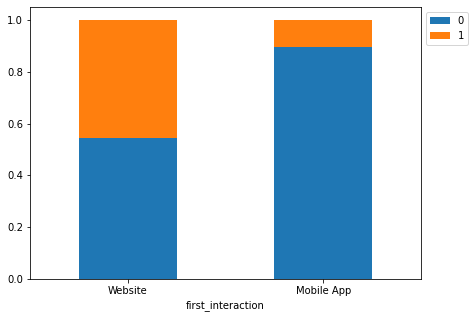

In [35]:
stacked_barplot(data, "first_interaction", "status")

#### Observations:

- **Near a half of successfully converted leads had interacted with ExtraaLearn by the website for the first time.** Let's further explore the leads behaviors on the website.

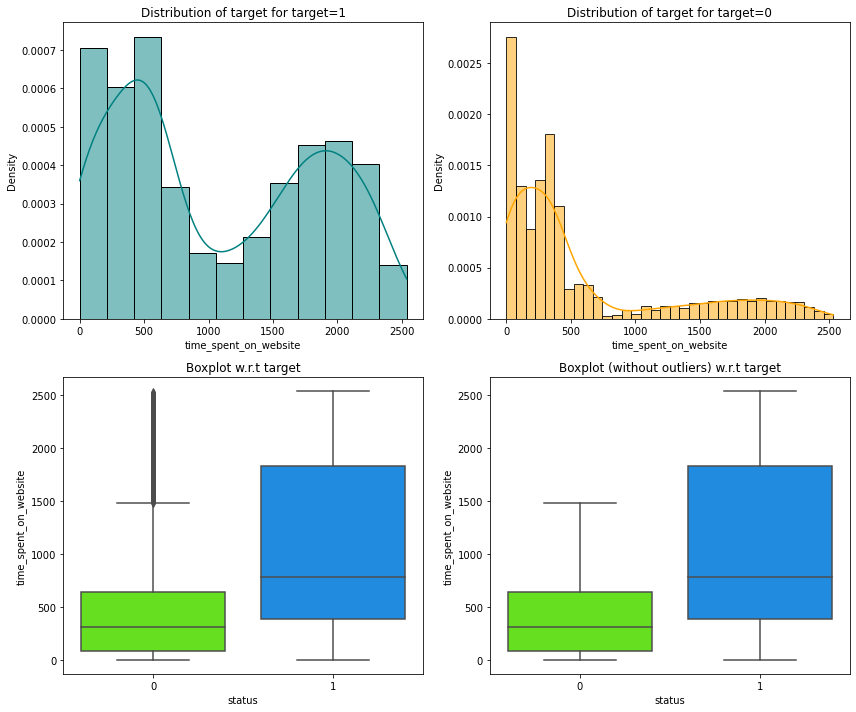

The median value of time_spent_on_website on target variable:


status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

In [42]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

# checking the median value
print("The median value of time_spent_on_website on target variable:")
data.groupby(["status"])["time_spent_on_website"].median()

#### Observations:

- For the univariate analysis, the distribution of time_spent_on_website is right skew. Most of the leads spent time on the website less than 100 minutes (around 1 hour), and do not exceed 800 minutes (around 13 hours).
- However, **this binary analysis indicates that there is another peak on the converted leads, which are the skewed data in the univariate analysis that spent time on the website between 1000 and 2500 (around 15-40 hours).**
- It implied that **the leads who spend more time on the website have a higher probability to be converted.**

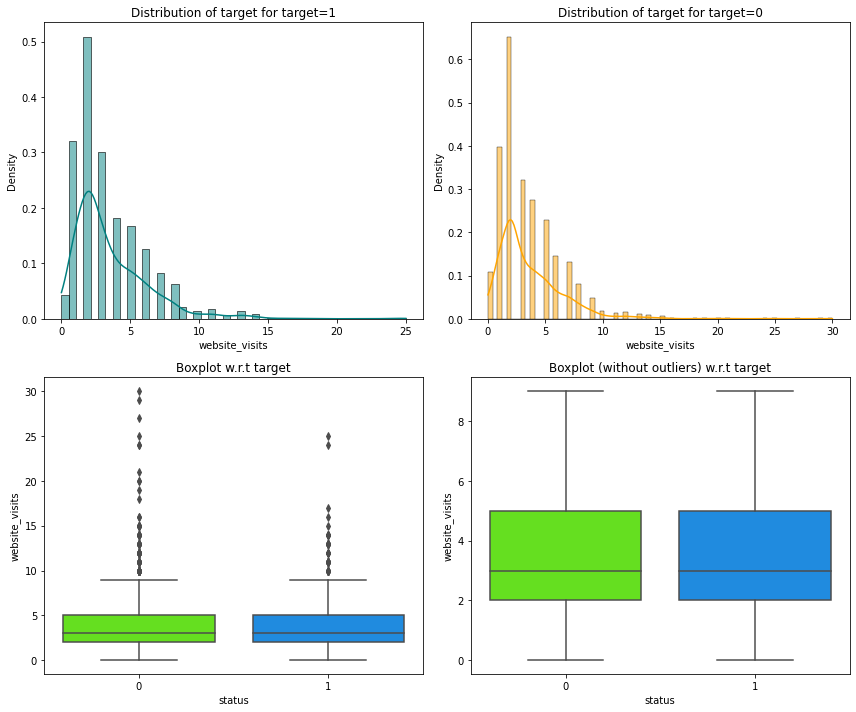

The median value of website_visits on target variable:


status
0   3.00000
1   3.00000
Name: website_visits, dtype: float64

In [43]:
distribution_plot_wrt_target(data, "website_visits", "status")

# checking the median value
print("The median value of website_visits on target variable:")
data.groupby(["status"])["website_visits"].median()

#### Observations:

- **The frequency of visiting website between converted leads and non-converted leads are similar** in that normally visited the website 3 times.

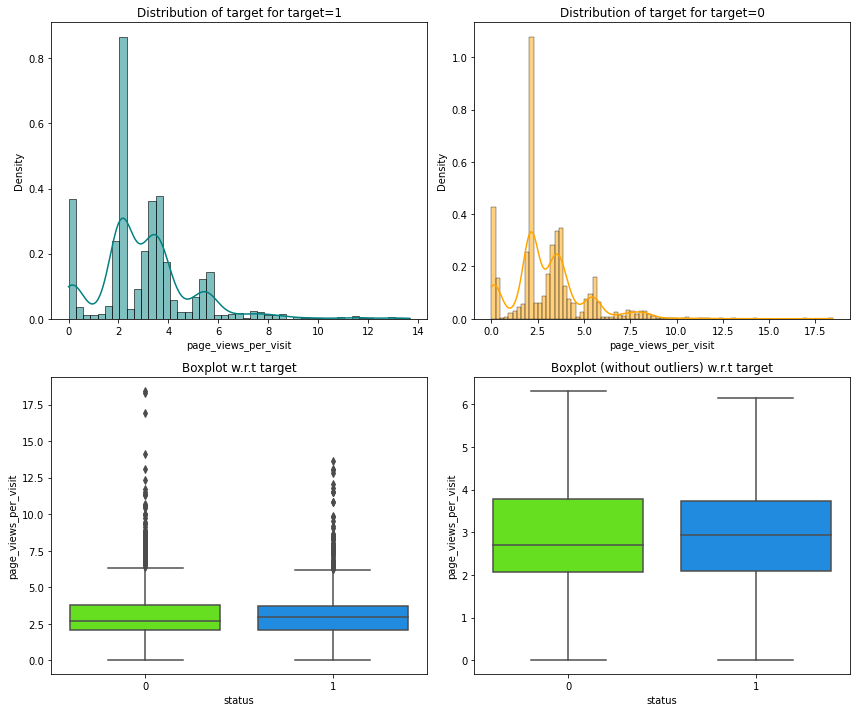

The median value of page_views_per_visit on target variable:


status
0   2.70600
1   2.93500
Name: page_views_per_visit, dtype: float64

In [44]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

# checking the median value
print("The median value of page_views_per_visit on target variable:")
data.groupby(["status"])["page_views_per_visit"].median()

#### Observations:

- **The behaviour of viewing pages between converted leads and non-converted leads are also similar**, most of the leads viewed 2~3 pages per visit.

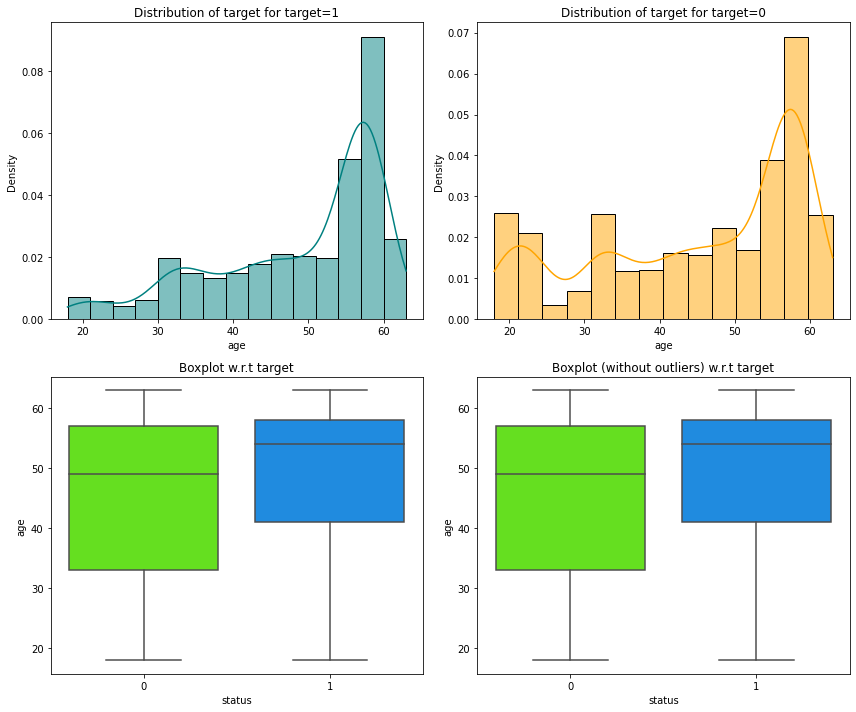

The median value of age on target variable:


status
0   49.00000
1   54.00000
Name: age, dtype: float64

In [47]:
distribution_plot_wrt_target(data, "age", "status")

# checking the median value
print("The median value of age on target variable:")
data.groupby(["status"])["age"].median()

#### Observations:

- The age of converted leads and non-converted leads are also similar, generally **around 40 to 60 years old.** 
- **Most of the converted leads are in their late 50.**

### 3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


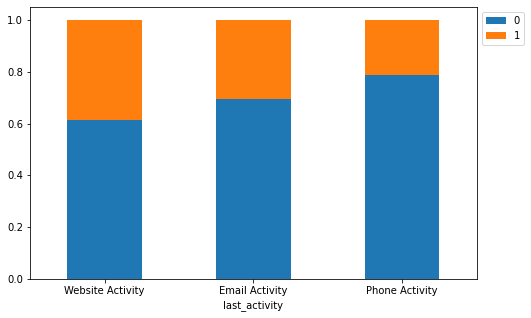

In [49]:
stacked_barplot(data, "last_activity", "status")

#### Observations:

- Based on the univariate analysis, email is the favorite channel for interactive action between the leads and ExtraaLearn.
- However, **most of the successfully converted leads had interacted with ExtraaLearn via website activity.**

### 4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


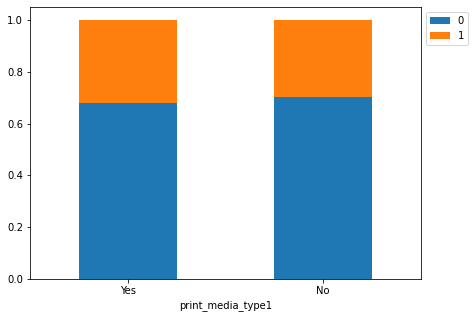

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


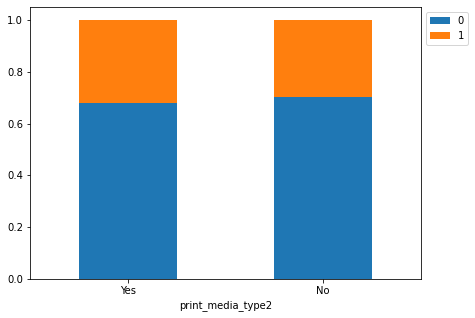

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


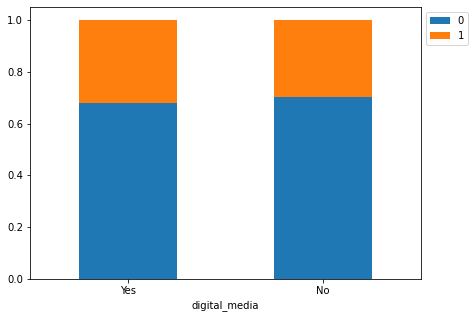

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


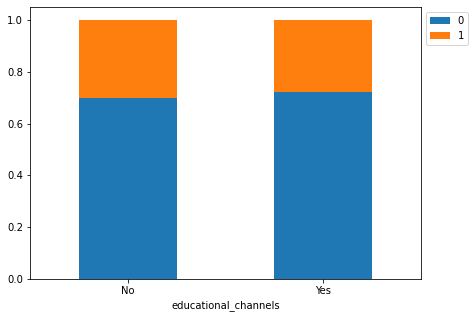

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


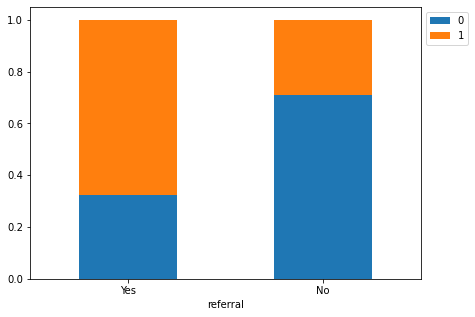

In [50]:
stacked_barplot(data, "print_media_type1", "status")
stacked_barplot(data, "print_media_type2", "status")
stacked_barplot(data, "digital_media", "status")
stacked_barplot(data, "educational_channels", "status")
stacked_barplot(data, "referral", "status")

#### Observations:

- Based on the univariate analysis, most leads had not seen or heard the advertisement via various channels such as print media, digital media, and referrals.
- There is **no significant affection between the lead conversion and media channels.** 
- However, **the leads who had heard about ExtraaLearn through references tended to be converted.**

### 5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


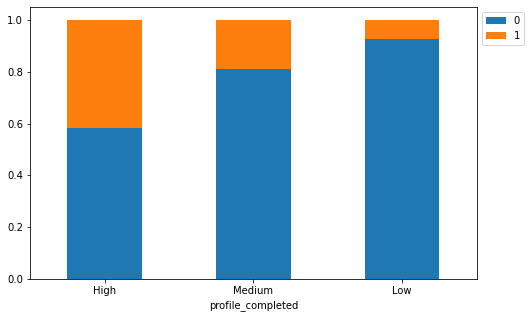

In [51]:
stacked_barplot(data, "profile_completed", "status")

#### Observations:

- Comparatively, **the leads who are willing to complete the profile have a higher probability to be converted.**

## Data Preprocessing

### Outlier Checking

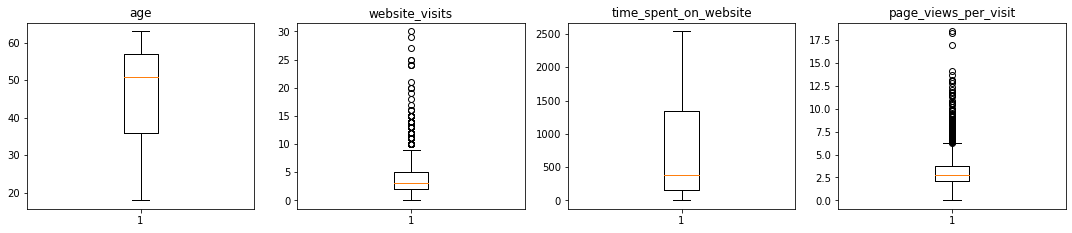

In [52]:
# check for outliers in the data, outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:

- An overview of the age and the behaviors of visiting websites, **the outlier distributes on the boxplots of website_visits, and page_view_per_visit.**

### Data preparation for modeling

In [53]:
X = data.drop(["status"], axis=1)
Y = data['status'] # Define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Get dummies for X to encode categorical features.

# Splitting the data in 70:30 ratio for train to test data to evaluate the model that we build on the train data.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [56]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


In [57]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.32000,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.07400,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.05700,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.91400,1,0,1,0,0,0,0,0,0,0,0,0


#### Observations:

- Notice that the column names of all the categorical variables, and also the overall number of columns has increased after creating the dummy variables.
- For each of those categorical variables, the first category has been removed, e.g., the category **Professional** of the categorical variable **current_occupation** has been removed and became the reference variable, and we only have the category Regular as a new column **current_occupation_Student**, and **current_occupation_Unemployed**.

## Building Decision Tree Model

### Model evaluation criterion

**1. Model can make wrong predictions as:**

- Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
- Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

**2. Which case is more important?**
- If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.
- If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss. So, company would want **Recall** to be maximized, greater the Recall score higher are the chances of minimizing **False Negatives**.

**3. Create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [58]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [59]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### Check performance of decision tree model on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



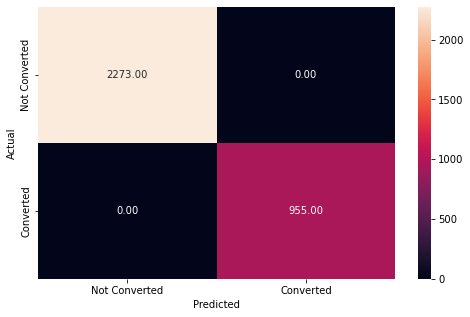

In [60]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(x_train)

metrics_score(y_train, y_pred_train1)

#### Observations

- **100% score for all metrics on the training dataset**, each sample has been classified correctly.
- Model has performed very well on the training set.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

### Check performance of decision tree model on testing data

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



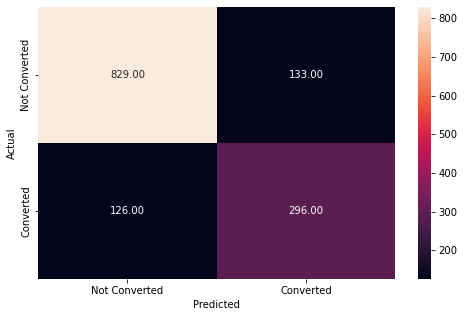

In [61]:
# Checking performance on the testing data to see if the model is overfitting
y_pred_test1 = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test1)

#### Observations

- The Decision Tree works well on the training data but not so well on the test data as the **recall is 0.70** in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data. For this, **the model predicts a lead will not get converted, but if the lead would have converted, then the company will lose a potential customer.**
- The precision of the test data suggests that there's a **31% (1 - 0.69)** chance that **the model will predict that the leads would have converted while they would not, and the company might lose resources by nurturing false-positive cases.**

### Decision Tree - Hyperparameter Tuning

Try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model. Use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. This would tell the model that 1 is the important class here. After tuning the model and fitting the tuned model on the training data, check the model performance on the training and testing data.

In [63]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

### Check performance on training set after hyperparameter tuning

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



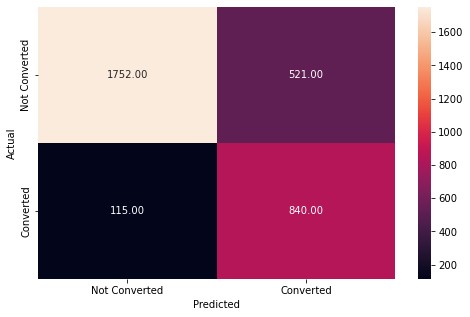

In [64]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train2)

#### Observations

- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- Tuned moded has provided a generalised performance with balanced precision and recall values.

### Check performance on testing data after hyperparameter tuning

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



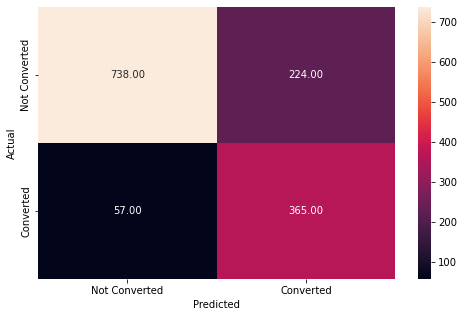

In [65]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(x_test)
metrics_score(y_test, y_pred_test2)

#### Observations

- The model performance on test data has significantly improved, the **Recall score increased from 0.70 to 0.86** with minimizing False Negatives.

### Visualizing Decision Tree Model

Visualize the tuned decision tree and observe the decision rules:

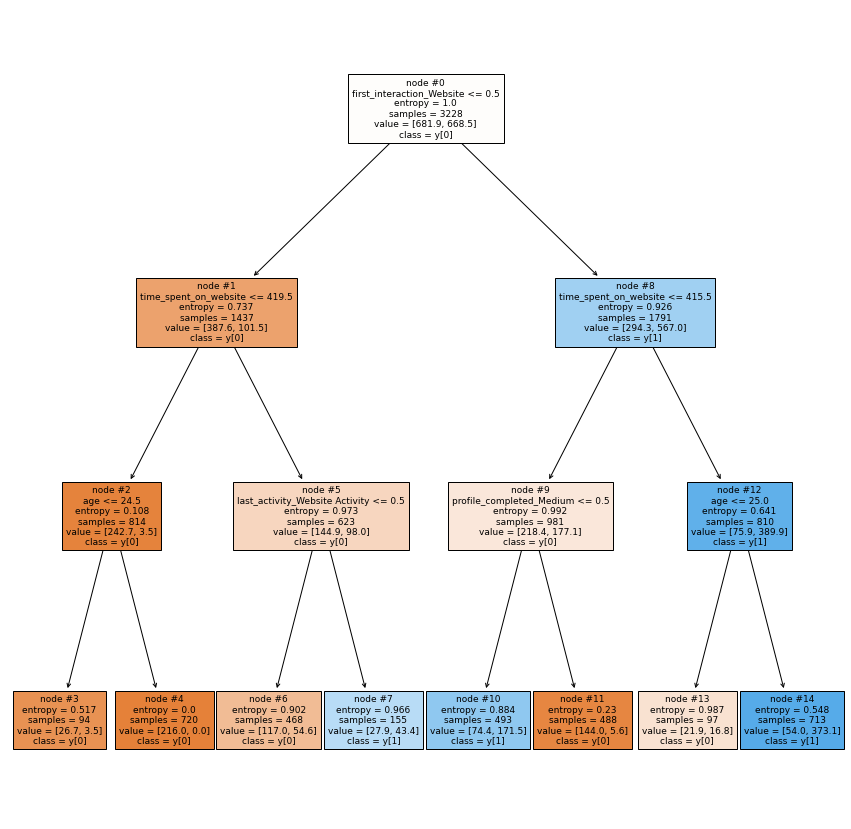

In [67]:
features = list(X.columns)

plt.figure(figsize = (15, 15))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **status, y[1]**, while the orange leaves represent the not converted leads, i.e., **status, y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

#### Observations:

The nodes with the lower amount of entropy imply that the nodes are relatively pure and have more information gained on these nodes. 

**Node #14 has the darkest blue color that represents the biggest group of converted leads with 713 samples**, its splitting features are as follows: 
- first_interaction is the website
- time_spent_on_website less than 415.5 minutes (around 7 hours)
- Age is not below 25

**Node #10 with darker blue color represents the second bigger group of converted leads with 493 samples**, its splitting features are as follows: 
- first_interaction is the website
- time_spent_on_website less than 415.5 minutes (around 7 hours)
- profile_completed is medium


### Look at the feature importance of the tuned decision tree model

In [68]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


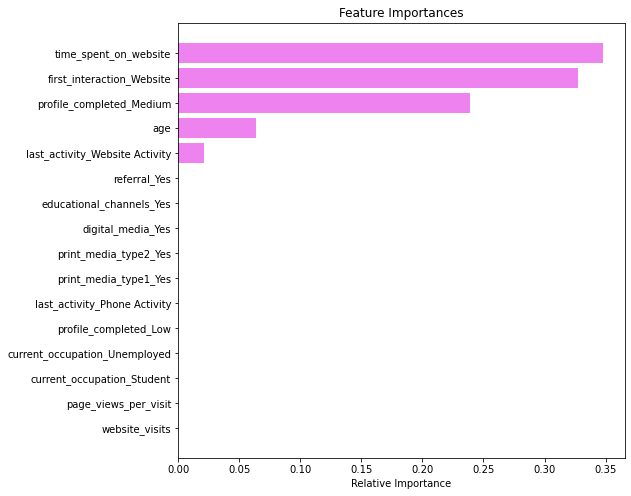

In [69]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:

- **Time spent on the website** and **first_interaction_website** are the most important features followed by **profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model**, while deciding whether a lead will be converted or not.


## Building Random Forest Model

Building a random forest classifier for better prediction of decision tree model.

In [70]:
# Fitting the random forest tree classifier on the training data

rf_estimator = RandomForestClassifier( random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

### Check performance of random forest model on training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



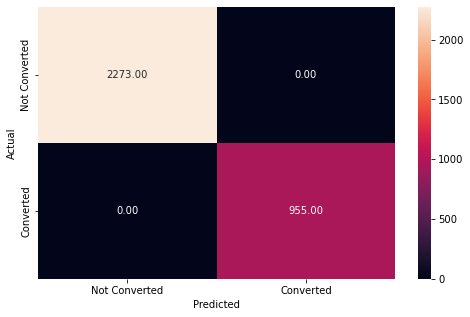

In [71]:
# Checking performance on the training data

y_pred_train3 = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train3)

#### Observations:

- **Almost 0 errors on the training set**, each sample has been classified correctly.
- Model has performed very well on the training set.

### Check performance of random forest model on testing data

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



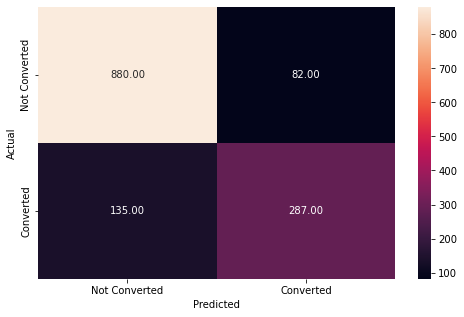

In [72]:
# Checking performance on the testing data to see if the model is overfitting

y_pred_test3 = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test3)

#### Observations:

- The Random Forest classifier **seems to be overfitting**.
- The **recall score is 0.68** which is low compared to other models.

### Random Forest Classifier - Hyperparameter Tuning

To reduce overfitting and improve recall, get a better model by tuning the random forest classifierby hyperparameter tuning.

Try tuning some of the important hyperparameters of the Random Forest Classifier.
There will not tune the **criterion** hyperparameter as we know from hyperparameter tuning for decision trees that **entropy** is a better splitting criterion for this data.

In [78]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

### Check performance on training data after hyperparameter tuning

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



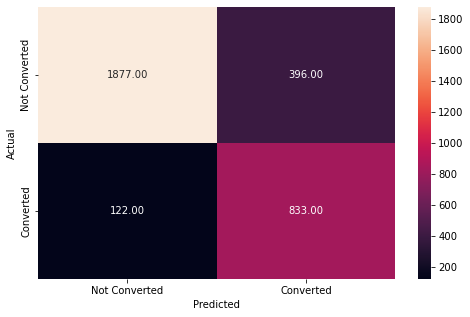

In [80]:
# Checking performance on the training data

y_pred_train4 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train4)

#### Observations:

- Random Forest model with default parameters is overfitting the training data and is not able to generalize well.
- Tuned moded has provided a generalised performance with balanced precision and recall values.

### Check performance on testing data after hyperparameter tuning

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



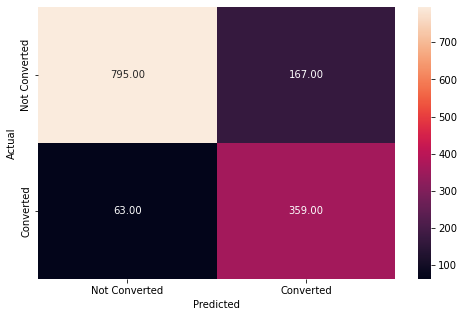

In [75]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test4)

#### Observations:

- The model performance on test data has significantly improved, the **Recall score increased from 0.68 to 0.85** with minimizing False Negatives.

###  Check the feature importance of random forest model

One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.

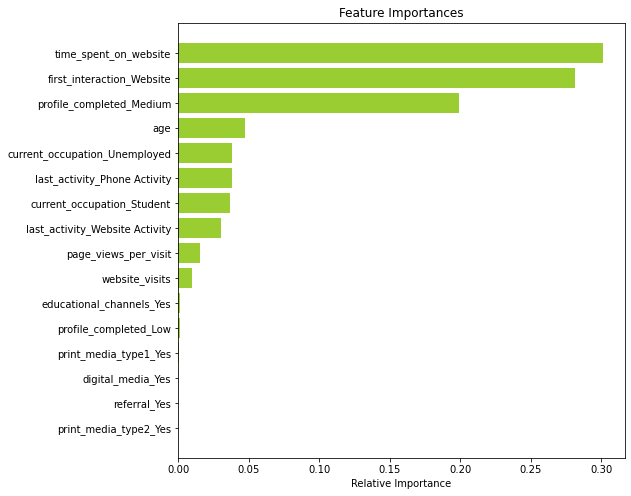

In [77]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'yellowgreen', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Observations:

- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, the **random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** 
- This implies that **the random forest is giving importance to more factors in comparison to the decision tree.**

## Conclusion and Recommendations

### Conclusions:


Through this data science project, a comprehensive analysis of the dataset was conducted, yielding valuable insights into lead conversion. The results of the exploratory data analysis revealed that the majority of converted leads belonged to the 40 to 60 age group, primarily comprising working professionals with a strong motivation to upskill. Surprisingly, traditional advertisements had minimal influence on these leads, highlighting the importance of alternative marketing strategies. Referrals proved to be a powerful tool for conversion, with a higher success rate observed among referred leads. Furthermore, factors such as extensive website engagement and completion of user profiles played crucial roles in lead conversion.

To optimize the model's performance, the decision tree algorithm was employed with hyperparameter tuning. This process led to significant enhancement in the model's performance on the testing dataset. The recall score increased from 0.70 to 0.86, indicating a reduction in missed conversion opportunities. The visual representation of the tuned decision tree emphasized the key factors affecting lead conversion. Features such as first_interaction_website, time_spent_on_website, profile_completed_medium, and age emerged as significant predictors, with nodes displaying lower entropy representing higher information gain and relative purity. 

Additionally, the random forest model was implemented to further refine predictions and mitigate overfitting. The incorporation of hyperparameter tuning resulted in improved recall scores for the random forest model. Apart from the top 4 variables defined by the decision tree model, other variables like occupation and page_views_per_visit were also identified as influential, suggesting a broader range of factors impacting lead conversion.

In conclusion, this data science project has provided valuable insights into the factors driving lead conversion for ExtraaLearn in the Edtech industry. By addressing overfitting through hyperparameter tuning and leveraging the random forest algorithm, the model's performance and predictive accuracy were significantly enhanced. These insights will enable ExtraaLearn to develop targeted strategies that maximize lead conversion and optimize resource allocation, ensuring continued success in the competitive Edtech market.

### Recommendations:

Based on the findings from the lead conversion analysis, here are some business recommendations:

- **Website Optimization:** Given that the website is the most effective channel to interact with leads, it is crucial to enhance the user experience of the website. Improve the website's design, navigation, and overall functionality to make it more user-friendly and engaging. Ensure that the website provides valuable and easily accessible information about the courses, features, and benefits of the online learning programs.


- **Referral Program:** Leverage the power of referrals to drive lead conversion. Develop a robust referral program that incentivizes existing customers, particularly those who have successfully converted, to refer the platform to their friends, colleagues, and professional networks. Offer rewards, discounts, or other incentives to both the referrer and the referred individual upon successful conversion.


- **Target Working Professionals and Individuals Seeking Employment:** In addition to working professionals who are interested in upskilling, it is important to also focus on individuals seeking employment, especially aged between 40 to 60. Tailor marketing and outreach efforts specifically towards these two demographics to maximize professional development and career transitions. Develop targeted campaigns that highlight the benefits of online learning programs for career advancement, skill acquisition, and increased employability. Showcase success stories of professionals who have achieved career growth or individuals who have successfully transitioned into new industries through upskilling. Utilize channels popular among working professionals and job seekers, such as professional networking platforms and job portals, to effectively reach and engage the target audience.


- **Real-World Case Studies and Hands-on Projects:** To attract and engage both working professionals and individuals seeking employment, enhance the online learning experience by incorporating real-world case studies and hands-on projects into the courses. This approach allows learners to apply their knowledge in practical scenarios, making the learning experience more meaningful and relevant to their professional lives. For individuals seeking employment, these real-world applications can help them adapt to new industries or make successful career transitions. Emphasize the practical applications and tangible outcomes of completing the courses to increase their appeal and value to the target audience.


- **Continuous Engagement and Follow-up:** Implement a comprehensive lead nurturing strategy to maintain engagement with potential customers. Provide personalized communication, such as targeted emails or newsletters, to keep leads informed about new course offerings, industry updates, and success stories from other professionals who have benefited from the online learning programs. Regularly follow up with leads who have shown interest but have not converted, offering additional support, incentives, or customized recommendations based on their specific needs and preferences.


- **Monitor and Analyze Data:** Continuously track and analyze data related to lead conversion, referral sources, user behavior on the website, and engagement levels. Utilize advanced analytics tools to gain insights into customer preferences, pain points, and patterns. This information can be used to further refine marketing strategies, optimize website performance, and identify opportunities for improvement.


By implementing these recommendations, ExtraaLearn can enhance lead conversion rates, ensure a more comprehensive and impactful learning experience, cater to the needs of working professionals looking to upskill, and individuals seeking employment, position itself as a valuable resource for career development, and assist learners in achieving their professional goals, and finally strengthen its position in the Online Education market. 